In [157]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [114]:
#Load dataset
df = pd.read_csv('cape_town_houses.csv')

In [115]:
#View first 5 rows
df.head()

,num_bedroom,location,bedroom_width,bedroom_height,bathroom_width,bathroom_height,garage_width,garage_height,erf_size,bath_amenities,car_parks,price
0,3.0,Woodstock,20.0,20.0,20.0,20.0,20.0,20.0,411,NaN,NaN,2562589
1,3.0,Walmer Estate,20.0,20.0,20.0,20.0,20.0,20.0,629,NaN,NaN,12303468
2,3.0,Woodstock,20.0,20.0,20.0,20.0,20.0,20.0,315,NaN,NaN,23102374
3,3.0,Woodstock,20.0,20.0,20.0,20.0,NaN,NaN,541,NaN,NaN,32805211
4,4.0,Oranjezicht,20.0,20.0,20.0,20.0,20.0,20.0,528,NaN,NaN,11605296


In [116]:
df.describe()

,num_bedroom,bedroom_width,bedroom_height,bathroom_width,bathroom_height,garage_width,garage_height,erf_size,bath_amenities,car_parks,price
count,2425.000000,455.0,455.0,459.0,459.0,293.0,293.0,2536.000000,1997.000000,1997.000000,2.536000e+03
mean,2.905773,20.0,20.0,20.0,20.0,20.0,20.0,427.194401,2.056335,2.056335,1.985194e+07
std,2.069215,0.0,0.0,0.0,0.0,0.0,0.0,159.504612,1.502988,1.502988,1.012477e+07
min,0.500000,20.0,20.0,20.0,20.0,20.0,20.0,150.000000,0.500000,0.500000,2.562589e+06
25%,2.000000,20.0,20.0,20.0,20.0,20.0,20.0,288.000000,1.000000,1.000000,1.111045e+07
50%,3.000000,20.0,20.0,20.0,20.0,20.0,20.0,425.000000,2.000000,2.000000,1.986649e+07
75%,3.000000,20.0,20.0,20.0,20.0,20.0,20.0,565.250000,2.500000,2.500000,2.863467e+07
max,33.000000,20.0,20.0,20.0,20.0,20.0,20.0,700.000000,25.000000,25.000000,3.699444e+07


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num_bedroom      2425 non-null   float64
 1   location         753 non-null    object 
 2   bedroom_width    455 non-null    float64
 3   bedroom_height   455 non-null    float64
 4   bathroom_width   459 non-null    float64
 5   bathroom_height  459 non-null    float64
 6   garage_width     293 non-null    float64
 7   garage_height    293 non-null    float64
 8   erf_size         2536 non-null   int64  
 9   bath_amenities   1997 non-null   float64
 10  car_parks        1997 non-null   float64
 11  price            2536 non-null   int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 237.9+ KB


In [118]:
df.isnull().sum()

num_bedroom         111
location           1783
bedroom_width      2081
bedroom_height     2081
bathroom_width     2077
bathroom_height    2077
garage_width       2243
garage_height      2243
erf_size              0
bath_amenities      539
car_parks           539
price                 0
dtype: int64

In [119]:
#Fill null values 
bedroom_mode=df['num_bedroom'].mode()
df['num_bedroom'].fillna(bedroom_mode[0], inplace=True)

location_mode=df['location'].mode()
df['location'].fillna(bedroom_mode[0], inplace=True)

bedroom_width_mode=df['bedroom_width'].mode()
df['bedroom_width'].fillna(bedroom_width_mode[0], inplace=True)

bedroom_height_mode=df['bedroom_height'].mode()
df['bedroom_height'].fillna(bedroom_height_mode[0], inplace=True)

garage_width_mode=df['garage_width'].mode()
df['garage_width'].fillna(garage_width_mode[0], inplace=True)

garage_height_mode=df['garage_height'].mode()
df['garage_height'].fillna(garage_height_mode[0], inplace=True)

bath_mode=df['bath_amenities'].mode()
df['bath_amenities'].fillna(bath_mode[0], inplace=True)

car_mode=df['car_parks'].mode()
df['car_parks'].fillna(car_mode[0], inplace=True)

bathroom_width_mode=df['bathroom_width'].mode()
df['bathroom_width'].fillna(bathroom_width_mode[0], inplace=True)

bathroom_height_mode=df['bathroom_height'].mode()
df['bathroom_height'].fillna(bathroom_height_mode[0], inplace=True)

In [125]:
#Encoding categorical data

df = pd.concat([df,pd.get_dummies(df['location'], prefix='location')],axis=1)

df.drop(['location'],axis=1, inplace=True)

In [126]:
df.head()

,num_bedroom,bedroom_width,bedroom_height,bathroom_width,bathroom_height,garage_width,garage_height,erf_size,bath_amenities,car_parks,...,location_Mouille Point,location_Oranjezicht,location_Rondebosch Village,location_SCHOONGEZICHT,location_Tamboerskloof,location_University Estate,location_Vredehoek,location_Walmer Estate,location_Woodstock,location_Zonnebloem
0,3.0,20.0,20.0,20.0,20.0,20.0,20.0,411,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,3.0,20.0,20.0,20.0,20.0,20.0,20.0,629,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,20.0,20.0,20.0,20.0,20.0,20.0,315,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,3.0,20.0,20.0,20.0,20.0,20.0,20.0,541,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,4.0,20.0,20.0,20.0,20.0,20.0,20.0,528,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [129]:
df.dtypes

num_bedroom                   float64
bedroom_width                 float64
bedroom_height                float64
bathroom_width                float64
bathroom_height               float64
                               ...   
location_University Estate      uint8
location_Vredehoek              uint8
location_Walmer Estate          uint8
location_Woodstock              uint8
location_Zonnebloem             uint8
Length: 307, dtype: object

In [131]:
df.describe()

,num_bedroom,bedroom_width,bedroom_height,bathroom_width,bathroom_height,garage_width,garage_height,erf_size,bath_amenities,car_parks,...,location_Mouille Point,location_Oranjezicht,location_Rondebosch Village,location_SCHOONGEZICHT,location_Tamboerskloof,location_University Estate,location_Vredehoek,location_Walmer Estate,location_Woodstock,location_Zonnebloem
count,2536.000000,2536.0,2536.0,2536.0,2536.0,2536.0,2536.0,2536.000000,2536.000000,2536.000000,...,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000
mean,2.866128,20.0,20.0,20.0,20.0,20.0,20.0,427.194401,1.831822,1.831822,...,0.000394,0.022082,0.000394,0.000394,0.013407,0.001577,0.022082,0.011041,0.056388,0.005126
std,2.031876,0.0,0.0,0.0,0.0,0.0,0.0,159.504612,1.401960,1.401960,...,0.019858,0.146979,0.019858,0.019858,0.115032,0.039692,0.146979,0.104515,0.230715,0.071428
min,0.500000,20.0,20.0,20.0,20.0,20.0,20.0,150.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.0,20.0,20.0,20.0,20.0,20.0,288.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,20.0,20.0,20.0,20.0,20.0,20.0,425.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,20.0,20.0,20.0,20.0,20.0,20.0,565.250000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.000000,20.0,20.0,20.0,20.0,20.0,20.0,700.000000,25.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
#Reorder price position
dum_price=df['price']
df.drop('price',axis=1,inplace=True)
df.insert(306,"price",dum_price)

In [142]:
#Assign features and target
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [143]:
X.shape

(2536, 306)

In [144]:
y.shape

(2536, 1)

In [145]:
#Split data into train and test set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=45)

In [149]:
#Split train data into train and validation set
xtrain,xval,ytrain,yval=train_test_split(X_train,y_train,test_size=0.25, random_state=42)

In [154]:
def objective(trial,xtrain=xtrain, ytrain=ytrain, xval=xval, yval=yval):
    seed = 42
    MODEL='xgb'
     
    if MODEL=='xgb':
        print('Training xgb:')
        score = fit_xgb(trial,xtrain,ytrain,xval,yval,seed)

        return score

In [155]:
def fit_xgb(trial,xgtrain,ygtrain,xgval,ygval,seed):
    
    params = {
        'n_estimators':trial.suggest_int('n_estimators',60,200),
        'max_depth':trial.suggest_int('max_depth',5,15),
        'min_child_weight':trial.suggest_int('min_child_weight',1,4),
        'subsample':trial.suggest_discrete_uniform('subsample',0.5,0.9,0.1),
        'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.5,0.9,0.1),
        'random_state':seed
    }
    
    model = xgb.XGBRegressor(**params)
    
    model.fit(xgtrain, ygtrain, eval_metric='rmse', verbose=True)
    
    # predictions
    preds = model.predict(xgval)
    rmse = np.sqrt(mean_squared_error(yval, preds))
    
    return rmse

In [160]:
#Run cell for score optimization for xgb.
study=optuna.create_study() 
study.optimize(objective,n_trials=50)

[I 2020-09-25 10:51:46,600] A new study created in memory with name: no-name-c7b8d73f-b5cc-4c8d-8f29-712623b7adb0


Training xgb:


[I 2020-09-25 10:51:47,047] Trial 0 finished with value: 11595668.760212967 and parameters: {'n_estimators': 92, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 0 with value: 11595668.760212967.


Training xgb:


[I 2020-09-25 10:51:48,844] Trial 1 finished with value: 12629102.74339038 and parameters: {'n_estimators': 158, 'max_depth': 14, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 0 with value: 11595668.760212967.


Training xgb:


[I 2020-09-25 10:51:50,587] Trial 2 finished with value: 13178222.93027297 and parameters: {'n_estimators': 169, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 11595668.760212967.


Training xgb:


[I 2020-09-25 10:51:51,240] Trial 3 finished with value: 11218389.459529381 and parameters: {'n_estimators': 133, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:52,695] Trial 4 finished with value: 12901476.524083842 and parameters: {'n_estimators': 188, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:53,845] Trial 5 finished with value: 13123123.848357016 and parameters: {'n_estimators': 153, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5, 'colsample_bytree': 0.7}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:54,487] Trial 6 finished with value: 12359803.333701048 and parameters: {'n_estimators': 79, 'max_depth': 15, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:55,625] Trial 7 finished with value: 12865380.11207698 and parameters: {'n_estimators': 111, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:56,627] Trial 8 finished with value: 13056147.430567926 and parameters: {'n_estimators': 105, 'max_depth': 14, 'min_child_weight': 1, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:57,362] Trial 9 finished with value: 12026610.106642613 and parameters: {'n_estimators': 153, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:58,159] Trial 10 finished with value: 11597476.041008266 and parameters: {'n_estimators': 132, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 3 with value: 11218389.459529381.


Training xgb:


[I 2020-09-25 10:51:58,462] Trial 11 finished with value: 10868064.331544386 and parameters: {'n_estimators': 60, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:51:58,831] Trial 12 finished with value: 10973154.97820005 and parameters: {'n_estimators': 63, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:51:59,418] Trial 13 finished with value: 11634280.361071354 and parameters: {'n_estimators': 60, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:51:59,783] Trial 14 finished with value: 11125490.169113418 and parameters: {'n_estimators': 67, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:52:00,286] Trial 15 finished with value: 11442046.52202015 and parameters: {'n_estimators': 62, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:52:00,990] Trial 16 finished with value: 12082154.000015551 and parameters: {'n_estimators': 83, 'max_depth': 12, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:52:02,025] Trial 17 finished with value: 12447762.62365166 and parameters: {'n_estimators': 100, 'max_depth': 9, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:52:02,395] Trial 18 finished with value: 11000001.039441798 and parameters: {'n_estimators': 76, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:52:03,054] Trial 19 finished with value: 11985457.355203032 and parameters: {'n_estimators': 121, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.6, 'colsample_bytree': 0.7}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:52:03,517] Trial 20 finished with value: 11402295.804119715 and parameters: {'n_estimators': 60, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 11 with value: 10868064.331544386.


Training xgb:


[I 2020-09-25 10:52:03,816] Trial 21 finished with value: 10836478.748877956 and parameters: {'n_estimators': 73, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 21 with value: 10836478.748877956.


Training xgb:


[I 2020-09-25 10:52:04,114] Trial 22 finished with value: 10825108.859450543 and parameters: {'n_estimators': 74, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:04,516] Trial 23 finished with value: 11157046.860059652 and parameters: {'n_estimators': 91, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:04,812] Trial 24 finished with value: 10836478.748877956 and parameters: {'n_estimators': 73, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:05,206] Trial 25 finished with value: 11533853.733441401 and parameters: {'n_estimators': 73, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:05,584] Trial 26 finished with value: 11091906.90109059 and parameters: {'n_estimators': 88, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:06,136] Trial 27 finished with value: 11577154.097903993 and parameters: {'n_estimators': 117, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:06,786] Trial 28 finished with value: 12051900.793633163 and parameters: {'n_estimators': 97, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:07,077] Trial 29 finished with value: 10881001.853390148 and parameters: {'n_estimators': 73, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:07,516] Trial 30 finished with value: 11249119.329825407 and parameters: {'n_estimators': 87, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 22 with value: 10825108.859450543.


Training xgb:


[I 2020-09-25 10:52:07,829] Trial 31 finished with value: 10782112.623858122 and parameters: {'n_estimators': 69, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:08,112] Trial 32 finished with value: 10828273.07887419 and parameters: {'n_estimators': 71, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:08,482] Trial 33 finished with value: 11005379.545532184 and parameters: {'n_estimators': 68, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:08,798] Trial 34 finished with value: 10899029.767956557 and parameters: {'n_estimators': 84, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:09,340] Trial 35 finished with value: 11695170.124810357 and parameters: {'n_estimators': 96, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:09,706] Trial 36 finished with value: 11233047.688101051 and parameters: {'n_estimators': 81, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:10,453] Trial 37 finished with value: 11697311.842859453 and parameters: {'n_estimators': 178, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:10,938] Trial 38 finished with value: 11870975.326029394 and parameters: {'n_estimators': 68, 'max_depth': 8, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:11,842] Trial 39 finished with value: 12713459.33630989 and parameters: {'n_estimators': 140, 'max_depth': 13, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:12,360] Trial 40 finished with value: 11395717.551213406 and parameters: {'n_estimators': 106, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:12,659] Trial 41 finished with value: 10828604.002516562 and parameters: {'n_estimators': 76, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:12,988] Trial 42 finished with value: 10853333.615449764 and parameters: {'n_estimators': 78, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:13,278] Trial 43 finished with value: 10838772.546650272 and parameters: {'n_estimators': 69, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:13,730] Trial 44 finished with value: 11286339.901301648 and parameters: {'n_estimators': 91, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:14,100] Trial 45 finished with value: 11221918.88408511 and parameters: {'n_estimators': 80, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 31 with value: 10782112.623858122.


Training xgb:


[I 2020-09-25 10:52:14,412] Trial 46 finished with value: 10776799.435960306 and parameters: {'n_estimators': 64, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 46 with value: 10776799.435960306.


Training xgb:


[I 2020-09-25 10:52:14,720] Trial 47 finished with value: 11125538.507920776 and parameters: {'n_estimators': 64, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 46 with value: 10776799.435960306.


Training xgb:


[I 2020-09-25 10:52:15,847] Trial 48 finished with value: 12481129.545107618 and parameters: {'n_estimators': 200, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 46 with value: 10776799.435960306.


Training xgb:


[I 2020-09-25 10:52:16,434] Trial 49 finished with value: 11873269.349778773 and parameters: {'n_estimators': 61, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 46 with value: 10776799.435960306.


In [161]:
reg_xgb=xgb.XGBRegressor(**study.best_params, random_state=42, n_jobs=4)
reg_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=64, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
price_prediction = reg_xgb.predict(X_test)

In [188]:
list(zip(df.columns[0:], reg_xgb.feature_importances_))

[('num_bedroom', 0.053485315),
 ('bedroom_width', 0.0),
 ('bedroom_height', 0.0),
 ('bathroom_width', 0.0),
 ('bathroom_height', 0.0),
 ('garage_width', 0.0),
 ('garage_height', 0.0),
 ('erf_size', 0.10885242),
 ('bath_amenities', 0.06465491),
 ('car_parks', 0.04969031),
 ('location_2.0', 0.07246258),
 ('location_ ', 0.0),
 ('location_1 Caleb Street', 0.0),
 ('location_1 DOCK Road', 0.0),
 ('location_1 First Avenue ', 0.0),
 ('location_1 Forest Glade ', 0.0),
 ('location_1 Jane Avenue', 0.0),
 ('location_1 KLOOF STREET ', 0.0),
 ('location_1 Long Street', 0.0),
 ('location_1 Phillips road', 0.0),
 ('location_1 Purley Street', 0.0),
 ('location_1 Reform Road ', 0.0),
 ('location_1 Schaap Road', 0.0),
 ("location_1 St John's Road ", 0.0),
 ('location_1 Upper Quarterdeck  Road', 0.0),
 ('location_1 Ventnor ', 0.0),
 ('location_1 Victoria Walk', 0.0),
 ('location_10 Blenheim Road', 0.0),
 ('location_10 East Lake  Way', 0.0),
 ('location_10 Greenfield Road', 0.0),
 ('location_10 Lilac Circl

In [189]:
len(reg_xgb.feature_importances_)

306

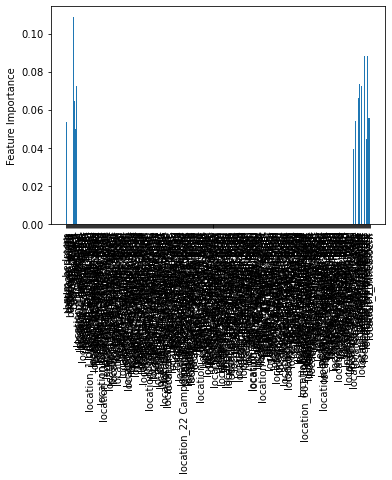

In [192]:
import matplotlib.pyplot as plt
plt.bar(df.columns[0:306], reg_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.show()

In [175]:
#format data for df_output
var_test=pd.DataFrame(y_test)
actual_prices=var_test.iloc[:,-1].values

In [183]:
df_output = pd.DataFrame()
df_output['Actual Price'] = actual_prices
df_output['Predicted Price'] = price_prediction
df_output

,Actual Price,Predicted Price
0,2597542,17187966.0
1,26112436,21707522.0
2,20705801,20252620.0
3,20440459,14912174.0
4,20681043,18168000.0
...,...,...
629,6605528,17028108.0
630,4043549,18660438.0
631,36512715,16636678.0
632,30171887,20788998.0


In [193]:
df_output.to_csv('Predicted_house_price.csv')